# MTA Exploratory Data Analysis

## Introduction

> a lot of people in New York using The Metropolitan Transportation subways as main way for transportation. The MTA says that it is serving a population of 15.3 million people across a 5,000-square-mile travel area surrounding New York City through Long Island, southeastern New York State, and Connecticut. So it has a huge amount of traffic daily. So from that traffic the advertising companies will not miss that so when you enter any subway station you will notice there are many and huge billboards every where in the station.

## Problem 

> The problem here that these advertisement methods are old and not compatible with the traffic and what are they interested on.

## My Solution 

> I will analyze data to investigate if there are some patterns from the visitors to the MTA stations. To have better billboards and to have compatible advertisements to the people and to know what the value of the billboard and how many people is will see it.

## Data Wrangling 

> I Will using the datasets from The Metropolitan Authority website ((http://web.mta.info/developers/turnstile.html) and they are publish every week their turnstiles data it has 8 columns i will take the last 3 months . <br>
>> ▪ C/A: Control Area <br>
▪ UNIT: Remote Unit for a station <br>
▪ SCP: Subunit Channel Position represents a specific address for a device <br>
▪ STATION: Represents the station name the device is located at <br>
▪ LINE NAME: Represents all train lines that can be boarded at this station <br>
▪ DIVISION: Represents the Line originally the station belonged to <br>
▪ DATE: Represents the date in (MM-DD-YY) format <br>
▪ TIME: Represents the time (hh:mm:ss) for a scheduled audit event <br>
▪ DESC: Represent the "REGULAR" scheduled audit event <br>
▪ ENTRIES: The cumulative entry register value for a device <br>
▪ EXITS: The cumulative exit register value for a device <br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605, 210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


## Assessing Data

In [4]:
# Here we will list the columns 
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [5]:
# shape of the data
turnstiles_df.shape

(2722610, 11)

In [6]:
turnstiles_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209067
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   2722610 non-null  object
 1   UNIT                                                                  2722610 non-null  object
 2   SCP                                                                   2722610 non-null  object
 3   STATION                                                               2722610 non-null  object
 4   LINENAME                                                              2722610 non-null  object
 5   DIVISION                                                              2722610 non-null  object
 6   DATE                                                                  2722610 non-n

<ipython-input-6-aaf6c11ca5e4>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  turnstiles_df.info(verbose=True, null_counts=True)


In [7]:
# Check for null values
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [8]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.722610e+06,2.722610e+06
mean,4.168248e+07,3.329946e+07
std,2.185146e+08,1.919706e+08
min,0.000000e+00,0.000000e+00
25%,2.179232e+05,9.944325e+04
50%,1.405620e+06,8.552440e+05
75%,6.023157e+06,3.968192e+06
max,2.147417e+09,2.122890e+09


## Data Cleaning 

>▪ Delete the space from `EXITS       ` column <br>
▪ Delete duplicates (drop `RECOVR AUD` from `DESC` column)  <br>
▪ Filter the data to only daily entries and exits <br>
▪ Add `Daily_entries` coulmn by finding the diffrence from `ENTRIES` column <br> 
▪ Add `Daily_exits` coulmn by finding the diffrence from `EXITS` column <br> 
▪ Add `Daily_trafic` coulmn by using `Daily_exits` + `Daily_entries` <br> 


In [9]:
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [10]:
# Delete the tab from `EXITS       ` column
turnstiles_df = turnstiles_df.rename(columns={'EXITS                                                               ':"EXITS"})

In [11]:
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [12]:
# Delete duplicates (drop RECOVR AUD from DESC column)
turnstiles_df.DESC.value_counts()

REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [13]:
turnstiles_df = turnstiles_df[turnstiles_df['DESC'] == 'REGULAR']

In [14]:
turnstiles_df.DESC.value_counts()

REGULAR    2710456
Name: DESC, dtype: int64

In [15]:
# Filter the data to only daily entries and exits
df_daily = (turnstiles_df.groupby([ 'C/A','UNIT','SCP','STATION','DATE']).ENTRIES.max().reset_index())

In [16]:
df_daily['EXITS'] = (turnstiles_df.groupby(['C/A','UNIT','SCP','STATION','DATE']).EXITS.max().reset_index().EXITS)

In [17]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,2590439
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200


In [18]:
# Add Daily_entries coulmn by finding the diffrence from ENTRIES column 

df_daily['DAILY_ENTRIES']= df_daily['ENTRIES'].diff()

df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,2590439,NaN
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548,254.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641,318.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917,585.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200,576.0


In [19]:
# Add Daily_exits coulmn by finding the diffrence from EXITS column
df_daily['DAILY_EXITS']= df_daily['EXITS'].diff()
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,2590439,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548,254.0,109.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641,318.0,93.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917,585.0,276.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200,576.0,283.0


In [20]:
# Solve the negetive values on Daily_entries and Daily_exits
df_daily['PREV_ENTRIES'] = df_daily['ENTRIES'].shift(1)
df_daily['PREV_EXITS'] = df_daily['EXITS'].shift(1)

In [21]:
def get_daily_counts(row, max_counter, name):
    counter = row[name] - row["PREV_"+name]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row[name], row["PREV_"+name])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=500000, name="ENTRIES")
df_daily["DAILY_EXITS"] = df_daily.apply(get_daily_counts, axis=1, max_counter=500000, name="EXITS")
df_daily.dropna(inplace= True)


Check Results

In [22]:
df_daily[((df_daily.ENTRIES ==0) & (df_daily.DAILY_ENTRIES < 0)) | (df_daily.ENTRIES ==0) & (df_daily.DAILY_EXITS < 0)].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS


In [23]:
df_daily[((df_daily.ENTRIES != 0) & (df_daily.DAILY_ENTRIES < 0)) | (df_daily.ENTRIES != 0) & (df_daily.DAILY_EXITS < 0)].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS


In [24]:
# Add Daily_trafic coulmn by using Daily_exits + Daily_entries
df_daily['DAILY_TRAFIC']= df_daily['DAILY_ENTRIES'] + df_daily['DAILY_EXITS']

In [25]:
# df_daily.drop(['DAILY_ENTRIES','DAILY_EXITS'],axis=1,inplace=True)

In [26]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFIC
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548,254.0,109.0,7579021.0,2590439.0,363.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641,318.0,93.0,7579275.0,2590548.0,411.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917,585.0,276.0,7579593.0,2590641.0,861.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200,576.0,283.0,7580178.0,2590917.0,859.0
5,A002,R051,02-00-00,59 ST,06/03/2021,7581328,2591445,574.0,245.0,7580754.0,2591200.0,819.0


In [27]:
# convert date to day_of_week
df_daily['DATE'] = pd.to_datetime(df_daily['DATE'])


df_daily['month'] = df_daily['DATE'].apply(lambda x: x.strftime('%B').lower())
df_daily['day_of_week'] = df_daily['DATE'].apply(lambda x: x.strftime('%A').lower())

In [28]:
# List of days in order
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday']
# create ordered categorical variable
df_daily['day_of_week'] = pd.Categorical(df_daily['day_of_week'],
                                               categories= day_order,
                                               ordered = True)

## Saving the dataset into csv file

In [29]:
df_daily.to_csv('DAILY_TRAFIC.csv') 

## Explatory Data Analysis

In [30]:
pd.set_option('float_format', '{:f}'.format)

In [31]:
df_station = df_daily.groupby(['STATION']).DAILY_TRAFIC.sum().reset_index().sort_values(['DAILY_TRAFIC'],ascending=False).head()

In [32]:
df_station_tail = df_daily.groupby(['STATION']).DAILY_TRAFIC.sum().reset_index().sort_values(['DAILY_TRAFIC'],ascending=False).tail()

In [33]:
df_station.STATION.value_counts()

GRD CNTRL-42 ST    1
23 ST              1
86 ST              1
FULTON ST          1
34 ST-PENN STA     1
Name: STATION, dtype: int64

In [34]:
df_daily.shape

(454195, 14)

In [35]:
# df_station[df_station['DAILY_TRAFIC'] > 1000000]
# = df_station[df_station['DAILY_TRAFIC'] < 10000].DAILY_TRAFIC.mean()

In [36]:
# df_station[df_station['DAILY_TRAFIC'] > 100000]

In [37]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFIC,month,day_of_week
1,A002,R051,02-00-00,59 ST,2021-05-30,7579275,2590548,254.000000,109.000000,7579021.000000,2590439.000000,363.000000,may,sunday
2,A002,R051,02-00-00,59 ST,2021-05-31,7579593,2590641,318.000000,93.000000,7579275.000000,2590548.000000,411.000000,may,monday
3,A002,R051,02-00-00,59 ST,2021-06-01,7580178,2590917,585.000000,276.000000,7579593.000000,2590641.000000,861.000000,june,tuesday
4,A002,R051,02-00-00,59 ST,2021-06-02,7580754,2591200,576.000000,283.000000,7580178.000000,2590917.000000,859.000000,june,wednesday
5,A002,R051,02-00-00,59 ST,2021-06-03,7581328,2591445,574.000000,245.000000,7580754.000000,2591200.000000,819.000000,june,thursday


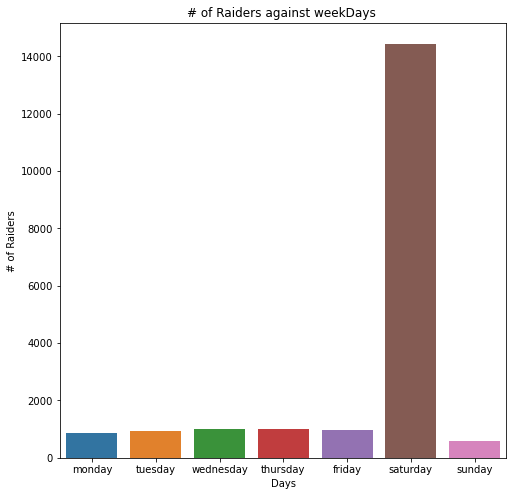

In [38]:
plt.figure(figsize = [8,8]);
axx = sns.barplot(data=df_daily,x='day_of_week',y='DAILY_TRAFIC'
 , ci=None);
plt.xlabel('Days');
plt.ylabel('# of Raiders');
plt.title('# of Raiders against weekDays ');
plt.xticks(rotation = 0);

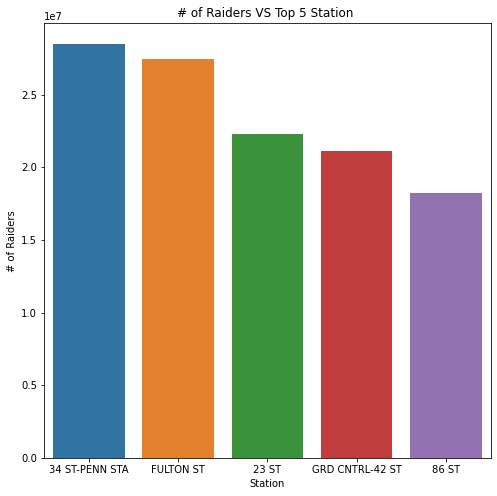

In [42]:
plt.figure(figsize = [8,8]);
ax1 = sns.barplot(data=df_station,x='STATION',y='DAILY_TRAFIC'
 , ci=None);
# ax2 = sns.barplot(data=df_station_tail,x='STATION',y='DAILY_TRAFIC'
#  , ci=None);
plt.xlabel('Station');
plt.ylabel('# of Raiders');
plt.title('# of Raiders VS Top 5 Station ');
plt.xticks(rotation = 0);

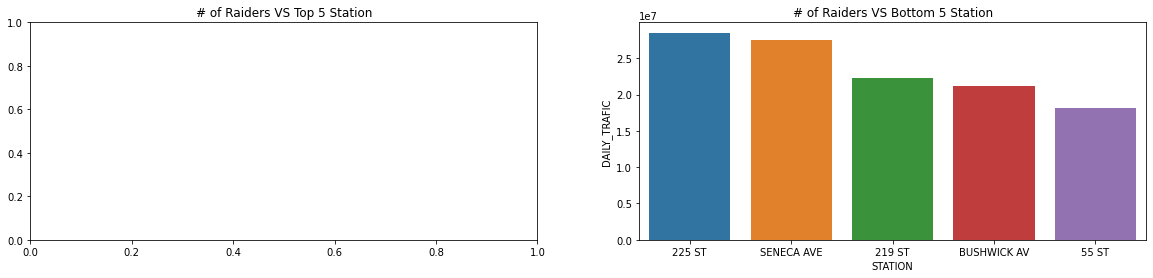

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
ax1.set_title("# of Raiders VS Top 5 Station")
ax1 = sns.barplot(data=df_station,x='STATION',y='DAILY_TRAFIC', ci=None);
ax2.set_title("# of Raiders VS Bottom 5 Station")
ax2 = sns.barplot(data=df_station_tail,x='STATION',y='DAILY_TRAFIC'
 , ci=None);
plt.show()